In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p

import warnings
warnings.filterwarnings("ignore")



In [2]:
test = pd.read_csv(r'C:\Users\Huawei\Documents\archive\test.csv')
train = pd.read_csv(r'C:\Users\Huawei\Documents\archive\train.csv')

In [3]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]
train = train[cols_subset]
test = test[cols_subset]

In [4]:
test.head()


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.866929              -0.910363             0.944461   
1           -0.968961              -0.968614             0.944461   
2           -0.976228              -0.983723             0.948704   
3           -0.974325              -0.983995             0.947309   
4           -0.975836              -0.988244             0.946221   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.894088                     -0.924705             -0.720009   
1         -0.894088                     -0.997186             -0.698091   
2         -0.939260                     -0.999083             -0.702771   
3         -0.938610                     -0.999171             -0.698954   
4         -0.938610                     -0.999355             -0.692245   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.276801             -0.057978              -0.571999        2   
1              0.281343             -0.083898              -0.918176        2   
2              0.280083             -0.079346              -0.384114        2   
3              0.284114             -0.077108              -0.635581        2   
4              0.290722             -0.073857              -0.507391        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

# Задание 1. Пропуски и дубли.

In [5]:
test.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [6]:
test.duplicated().sum()

0

In [7]:
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [8]:
train.duplicated().sum()

0

**Выводы**

Пропусков в данных нет, дублей тоже

# Задание 2. Стат. описание.

In [9]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

In [10]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

**Вывод**

Странных значений не обнаружено, подозрительных различий между таблицами нет.

# Задание 3. Проверка сбалансированности данных.

In [11]:
test['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [12]:
round((100 - 420/537*100))

22

In [13]:
train['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [14]:
round(100 - 986/1407 *100)

30

**Вывод**

Критических различий между размерами категорий нет, можно продолжать работу.

# Задание 4. Корреляции признаков.

In [15]:
traind = pd.get_dummies(train, columns=['Activity'])
testd = pd.get_dummies(test, columns=['Activity'])

In [16]:
traind.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_LAYING                        -0.396643              -0.386730   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_LAYING                         -0.973167         -0.394745   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_LAYING                                  -0.287395   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

In [17]:
testd.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity_LAYING                        -0.432375              -0.409460   
Activity_SITTING                       -0.401367              -0.395664   
Activity_STANDING                      -0.414812              -0.379256   
Activity_WALKING                        0.382256               0.522026   
Activity_WALKING_DOWNSTAIRS             0.533885               0.464393   
Activity_WALKING_UPSTAIRS               0.399410               0.255742   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity_LAYING                         -0.983505         -0.407889   
Activity_SITTING                         0.196159         -0.396788   
Activity_STANDING                        0.244371         -0.408003   
Activity_WALKING                         0.227835          0.281951   
Activity_WALKING_DOWNSTAIRS              0.193024          0.638335   
Activity_WALKING_UPSTAIRS                0.163337          0.364582   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity_LAYING                                  -0.342430   
Activity_SITTING                                 -0.295023   
Activity_STANDING                                -0.323854   
Activity_WALKING                                  0.213190   
Activity_WALKING_DOWNSTAIRS                       0.270809   
Activity_WALKING_UPSTAIRS                         0.524637   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)               

**Выводы**

1. В большинстве сочетаний признаков высоко коррелированы дру с другом, что не вызывает вопросов с точки зрения базовых законов физики.
Так, например, усредненная величина ускорения тела и медианная величина рывка высоко коррелированы, и это логично. Чем сильнее рывок, тем выше ускорение.

2. Значения корреляций фиктивных переменных активностей также понятны: чем больше движения предполагает активность, тем выше корреляция с признаками, отражающими разные составляющие движения.

3. Существенных различий в корреляциях признаков между двум выборками нет.

# Задание 5. Математические функции.

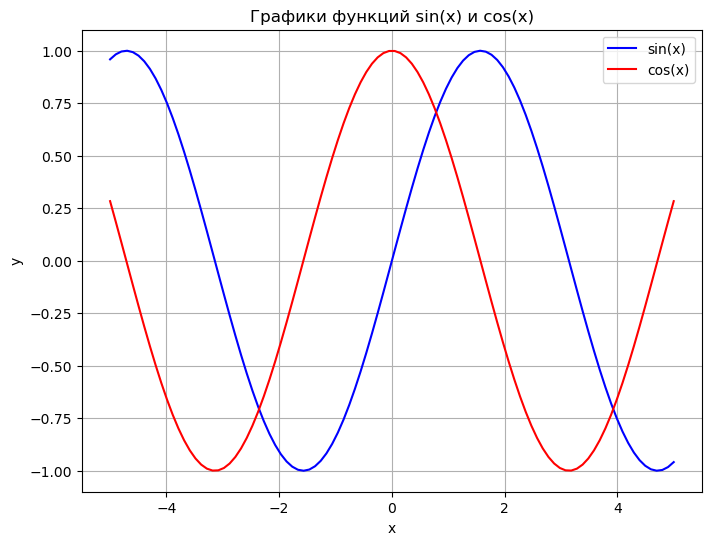

In [18]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

def f1(x):
    return np.sin(x)

def f2(x):
    return np.cos(x)

plt.figure(figsize=(8, 6))
plt.plot(x, f1(x), label='sin(x)', color='blue')  
plt.plot(x, f2(x), label='cos(x)', color='red')   
plt.title('Графики функций sin(x) и cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()  
plt.grid(True)  
plt.show()

# Задание 6. Сравнение семплов.

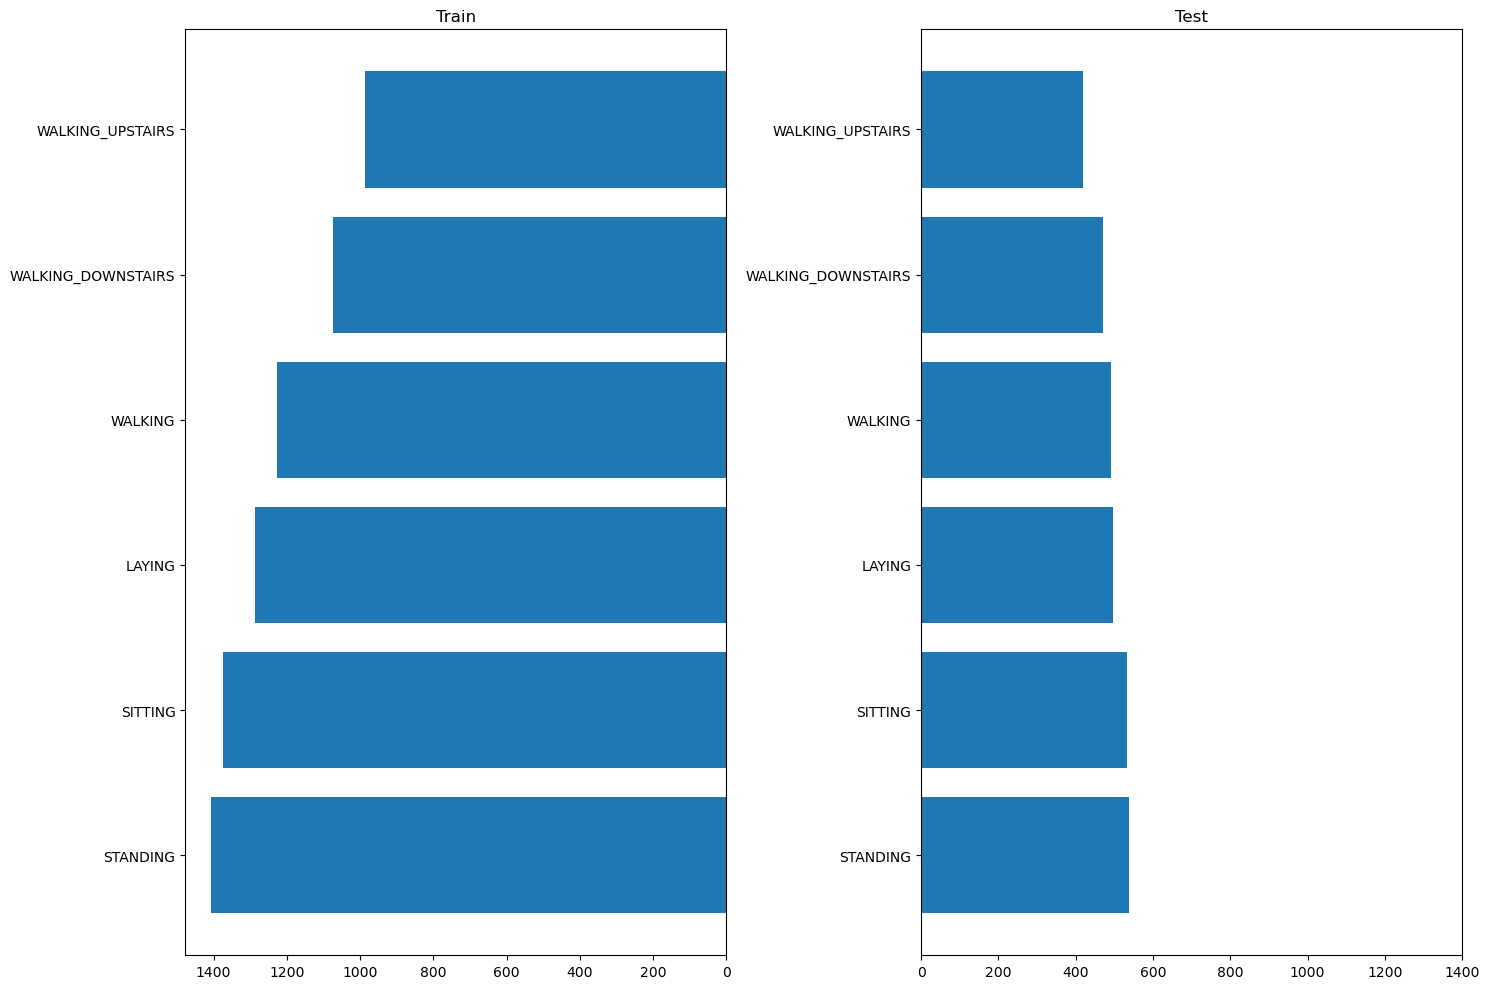

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.barh(train['Activity'].unique(), train['Activity'].value_counts())
ax1.set_title('Train')
ax1.invert_xaxis()

ax2.barh(test['Activity'].unique(), test['Activity'].value_counts())
ax2.set_title('Test')
ax2.set_xlim([0, 1400])


plt.tight_layout()

plt.show()

# Задание 7. Тепловая карта корреляций.

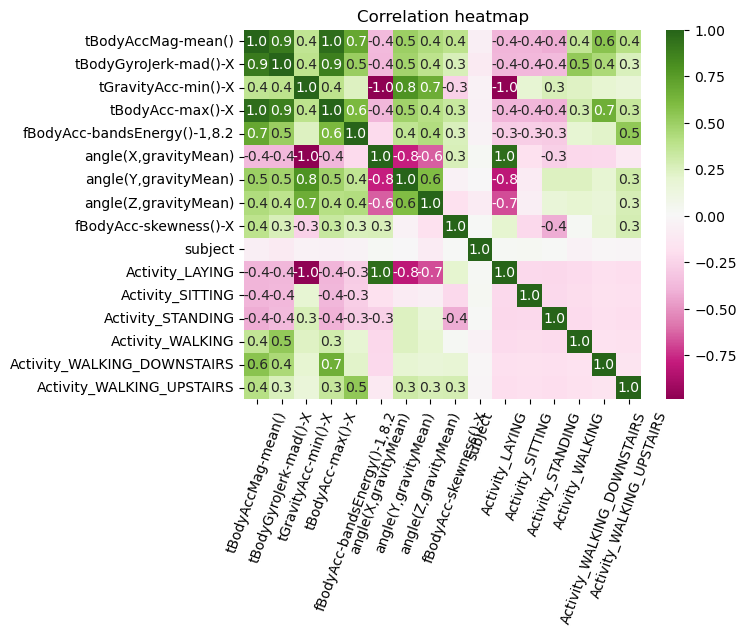

In [20]:
ax = sns.heatmap(traind.corr(), cmap="PiYG", annot=True, fmt="0.1f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

plt.title('Correlation heatmap')
        
plt.xticks(rotation=70)
plt.show()

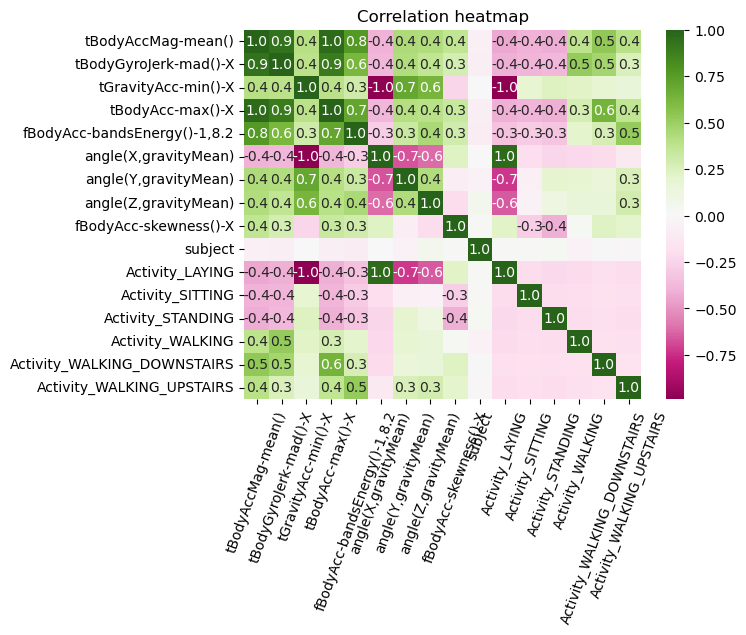

In [21]:
ax = sns.heatmap(testd.corr(), cmap="PiYG", annot=True, fmt="0.1f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")
        
plt.title('Correlation heatmap')
plt.xticks(rotation=70)
plt.show()

Признак, который не стоит учитывать при анализе - это sublect, так как это просто порядковые номера наблюдений. Они не должны ни с чем коррелировать, что мы и наблюдаем (в пределах погрешности).

# Задание 8. Pairplot.

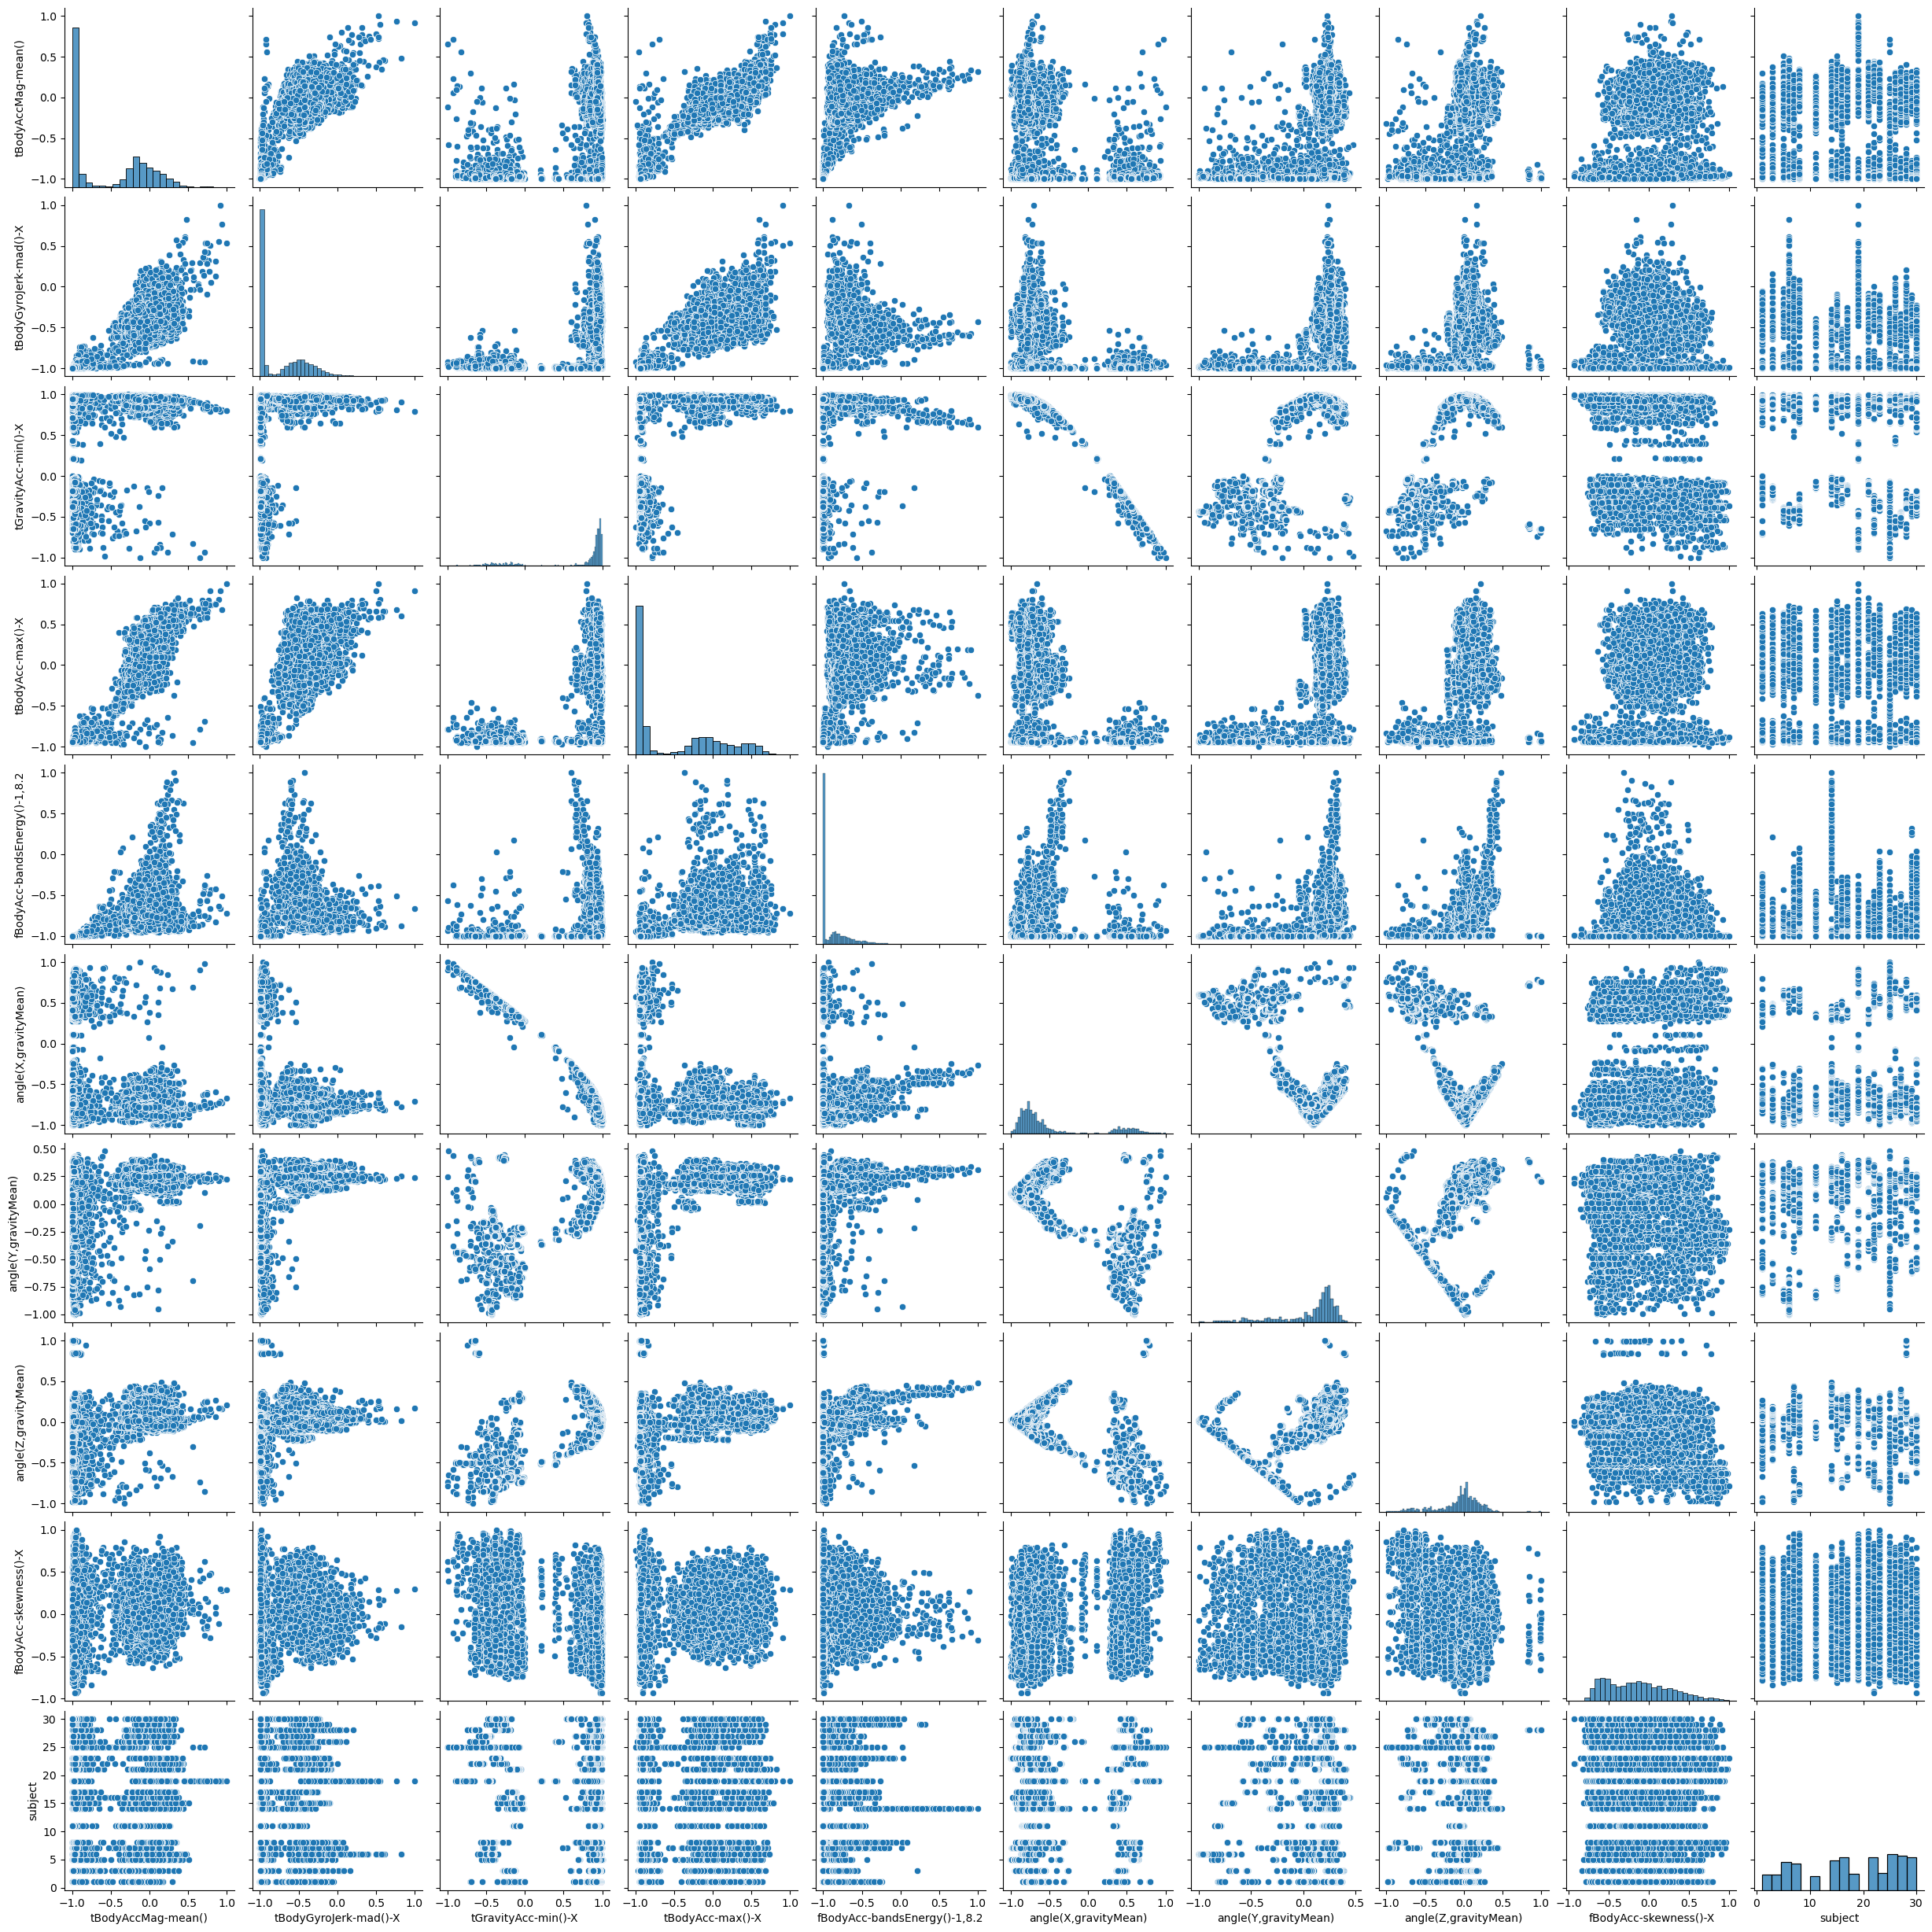

In [22]:
sns.pairplot(train)

**Выводы**
1. На диаграммах связи величин ничего нового или подозрительного вынести не удалось
2. Читать график неудобно! Зато их интересно разглядывать, вполне себе тест роршаха.


# Задание 9. Плотность распределения (kde) tBodyAccMag-mean().

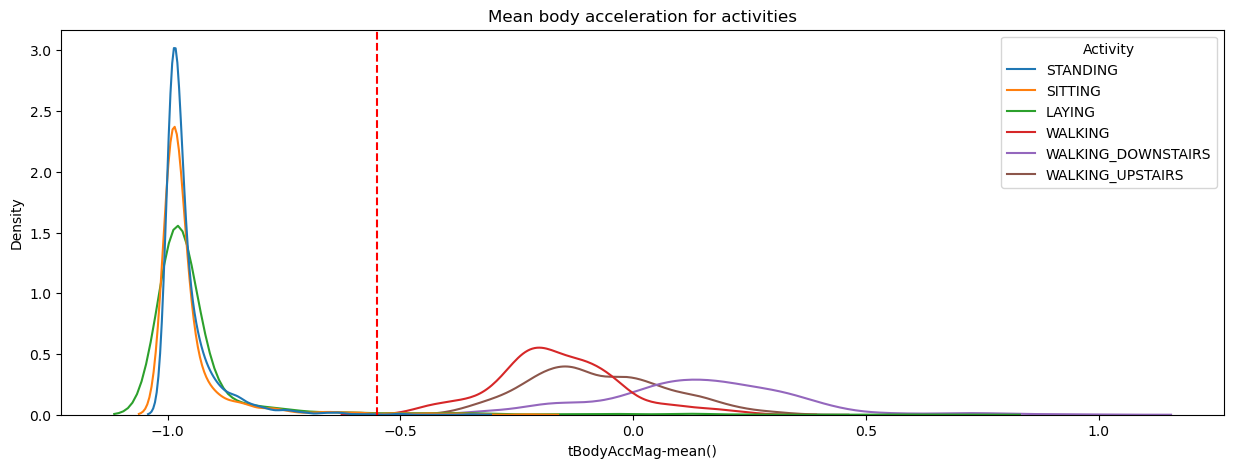

In [23]:
plt.figure(figsize=(15,5))
sns.kdeplot(train, x="tBodyAccMag-mean()", hue="Activity")
plt.axvline(x=-0.55, color='r', linestyle='--')
plt.title('Mean body acceleration for activities')

plt.show()

In [24]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [25]:
train['is in group'] = (train['tBodyAccMag-mean()'] <= -0.55) & (train['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])) | (train['tBodyAccMag-mean()'] > -0.55) & ~(train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))

In [26]:
train['is in group'].mean()

0.9908868335146899

**Выводы**

Точность проведенной линии разграничения оказалась высокой и составила 99%. Именно данный признак так хорошо разделяет группы активностей, так как отражает непосредственно движение самого объекта. У статических активностей, которые предполагают минимальное движение тела, ускорение будет всегда отрицательным. У динамических, которые предполагают усилия мышц, ускорение будет ближе к нулю или выше нуля.

# Задание 10. Ящики с усами для angle(X,gravityMean)

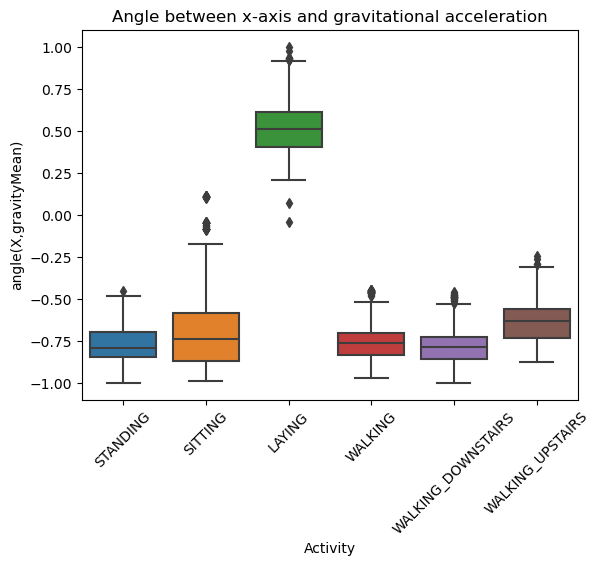

In [27]:
sns.boxplot(train, y = 'angle(X,gravityMean)', x = 'Activity')
plt.xticks(rotation=45)
plt.title('Angle between x-axis and gravitational acceleration')
plt.show()

In [43]:
train[train['Activity'] == 'WALKING_UPSTAIRS']['angle(X,gravityMean)'].describe()

count    1073.000000
mean       -0.633301
std         0.120686
min        -0.876955
25%        -0.732980
50%        -0.633239
75%        -0.560307
max        -0.246872
Name: angle(X,gravityMean), dtype: float64

# Задание 11. Скрипичные диаграммы для tBodyAcc-max()-X. 

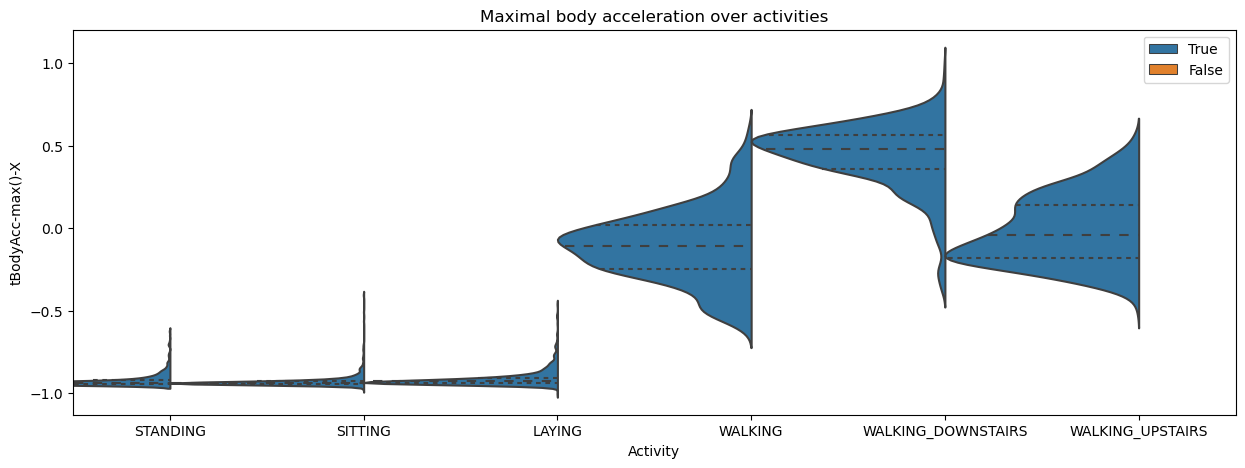

In [29]:
plt.figure(figsize=(15,5))
sns.violinplot(train, x = 'Activity', y = 'tBodyAcc-max()-X', width=2,  hue=True,
    hue_order=[True, False], split=True, inner='quarte')
plt.title('Maximal body acceleration over activities')
plt.show()

**Выводы**

Активность, которая выделяется среди других - это спуск с лестницы. Среднее максимального ускорение заметно выше, чем у других активностей из группы динамических. Возможно, это связано с тем, что спускаться с лестницы проще, чем подниматься по ней или идти по ровной дороге.

# Задание 12. Гистограммы групп активностей.

In [30]:
train_stat = train[train['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])]
train_dinam = train[~train['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])]

Text(0.5, 0.98, 'Angle and energy for activity groups')

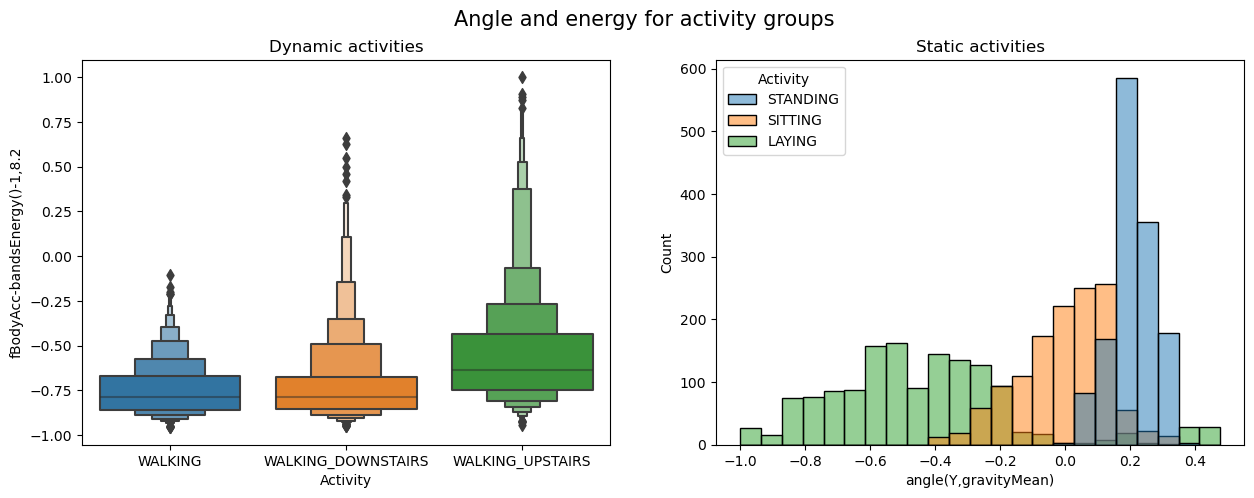

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.boxenplot(train_dinam, y = 'fBodyAcc-bandsEnergy()-1,8.2', x='Activity')
plt.title('Dynamic activities')

plt.subplot(1,2,2)

sns.histplot(train_stat, x = 'angle(Y,gravityMean)', hue = 'Activity')
plt.title('Static activities')

plt.suptitle('Angle and energy for activity groups', fontsize=15)

**Выводы**

Энергия ускорения тела в интервале частоты заметно выше у восхождения по лестнице. (если я вообще правильно понимаю о чем речь!) Возможно, это объясняется наибольшими усилиями, которые человек должен приложить при выполнении этой активности. 



# Задание 13. 


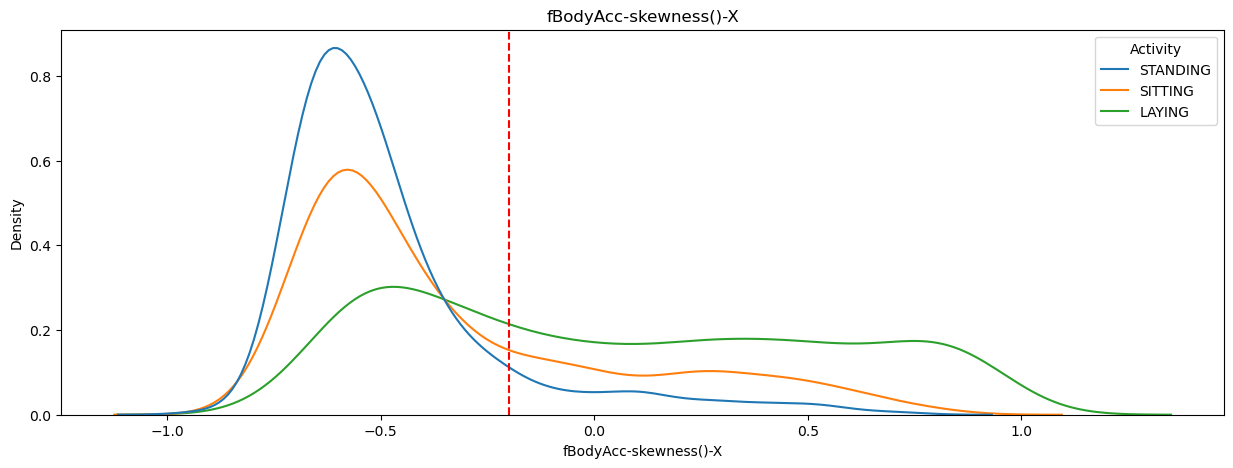

In [32]:
plt.figure(figsize=(15,5))
sns.kdeplot(train_stat, x="fBodyAcc-skewness()-X", hue="Activity")
plt.axvline(x=-0.2, color='r', linestyle='--')
plt.title('fBodyAcc-skewness()-X')

plt.show()

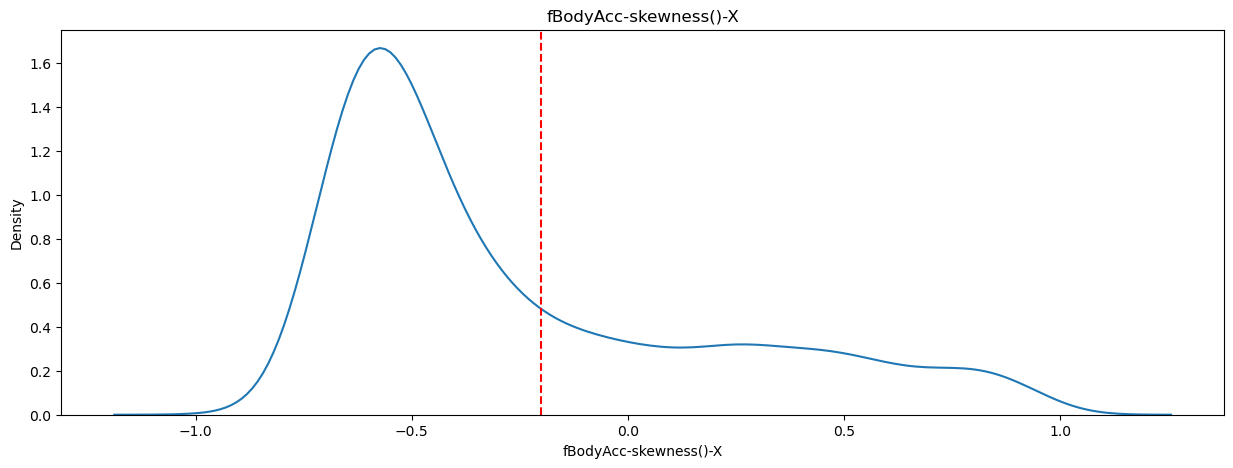

In [33]:
plt.figure(figsize=(15,5))
sns.kdeplot(train_stat, x="fBodyAcc-skewness()-X")
plt.axvline(x=-0.2, color='r', linestyle='--')
plt.title('fBodyAcc-skewness()-X')

plt.show()

**Вывод**

Да, категории можно разделить по признаку fBodyAcc-skewness()-X. Так как распределение асимметрично, мы можем разделить группы на уровне приблизительно -0.2, где начинается длинный правый хвост распределения.

<function matplotlib.pyplot.show(close=None, block=None)>

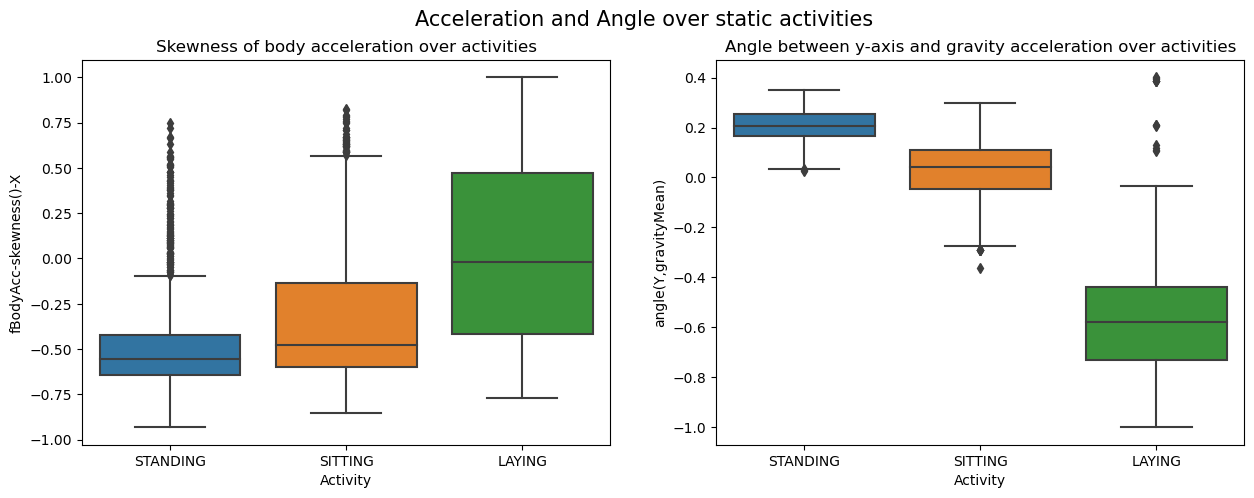

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.boxplot(train_stat, x = 'Activity', y = 'fBodyAcc-skewness()-X')

plt.title('Skewness of body acceleration over activities')

plt.subplot(1,2,2)

sns.boxplot(train_stat[train_stat['fBodyAcc-skewness()-X'] < -0.376], x = 'Activity', y = 'angle(Y,gravityMean)')

plt.title('Angle between y-axis and gravity acceleration over activities')
plt.suptitle('Acceleration and Angle over static activities', fontsize=(15))
plt.show

**Вывод** 

В подвыборке, где fBodyAcc-skewness()-X < -0.376, среди статических активностей, выделяется лежание: медиана угла между осью У и средним гравитационным ускорением является отрицательной.

# Задание 14. tGravityAcc-min()-X.

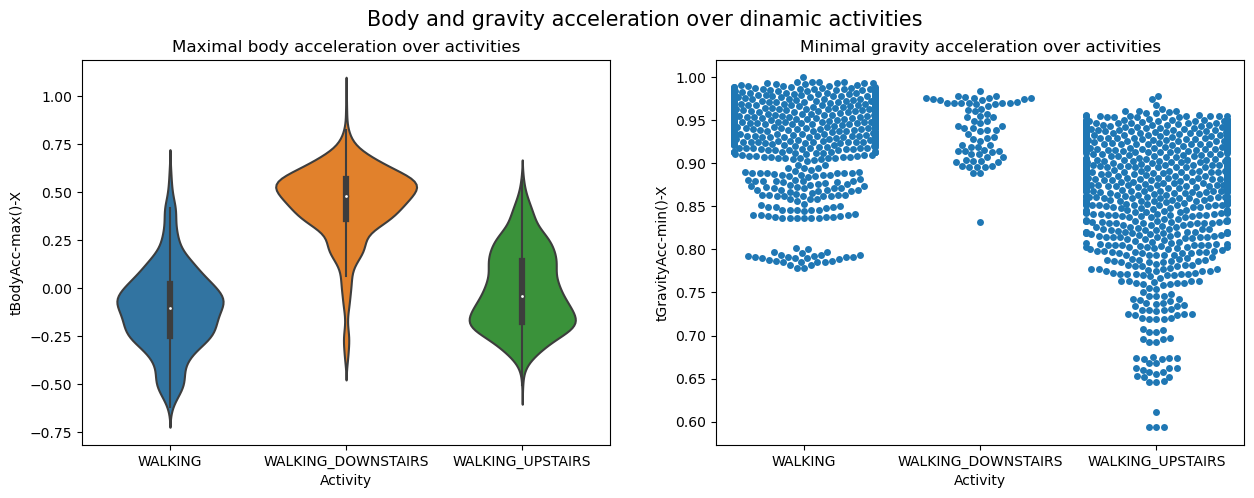

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(train_dinam, x = 'Activity', y = 'tBodyAcc-max()-X')
plt.title('Maximal body acceleration over activities')

plt.subplot(1,2,2)
sns.swarmplot(train_dinam[train_dinam['tBodyAcc-max()-X']<0.157], x = 'Activity', y = 'tGravityAcc-min()-X')
plt.title('Minimal gravity acceleration over activities')
plt.suptitle('Body and gravity acceleration over dinamic activities', fontsize=15)

plt.show()

# Задание 15.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

In [ ]:
df_2_comp

In [ ]:
p.scatter(df_2_comp, x='x', y = 'y', color='Activity', title='Data in two-dimensional space by category')


**Вывод**

На графике заметны скопления точек одного цвета, очертить эти скопления можно, но лишь условно.

In [ ]:
p.scatter_3d(df_3_comp, x='x', y = 'y', z = 'z', color='Activity', title='Data in 3-dimensional space by category')


**Вывод**

Структура проглядывается у статических активностей, а динамические практически слились в одну массу, на глаз их разграничить непросто.

# Задание 16

In [54]:
def predict(df: pd.DataFrame):
    if df['tBodyAccMag-mean()'] <= -0.55:
        #static group
        if df['angle(X,gravityMean)'] > 0.24:
            return "LAYING"
        elif (df['fBodyAcc-skewness()-X'] < -0.376 and df['angle(Y,gravityMean)'] > 0.18) or (df['angle(Y,gravityMean)'] >= 0.2):
            return 'STANDING'
        else:
            return 'SITTING'
    else:
        if (df['tBodyAcc-max()-X'] > 0.2 or (df['tBodyAccMag-mean()'] > 0.25) and df['tBodyAccMag-mean()'] > -0.4) or df['tBodyAcc-max()-X'] > 0.5:
            return 'WALKING_DOWNSTAIRS'
        elif (df['angle(X,gravityMean)'] >= -0.73 or df['fBodyAcc-bandsEnergy()-1,8.2'] >= -0.25) and df['tBodyAccMag-mean()'] > -0.4 :
            return 'WALKING_UPSTAIRS'
        else:
            return 'WALKING'
    
def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()
train_preds = train.apply(predict, axis = 1)
test_preds = test.apply(predict, axis = 1)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.801550598476605
Accuracy on test set => 0.7611129962673906
